# An Empirical Comparison of Machine Learning Models for Early Prediction of Unemployment Rates Across Countries




## Introduction 


### Background 
Unemployment rates serve as a critical economic indicator, reflecting the health of labor markets and influencing socio-economic stability worldwide. High unemployment can lead to reduced consumer spending, increased poverty, and social unrest, while low unemployment rates often signal economic prosperity. The ability to predict unemployment rates early is vital for policymakers to design proactive interventions, such as job creation programs and economic stimulus packages. This project leverages a comprehensive dataset of unemployment rates from 1991 to 2024 across various countries to analyze historical trends and develop machine learning models for early prediction. By comparing different models, this study aims to identify the most effective approach for forecasting unemployment, contributing to informed economic decision-making globally.


### Research Problem

Early prediction of unemployment rates is challenging due to the complex interplay of economic, social, and political factors that vary across countries. Historical unemployment data often contains missing values, outliers, and inconsistencies, complicating the application of machine learning models. Furthermore, external shocks like the 2008 financial crisis or the 2020 COVID-19 pandemic introduce volatility, making it difficult to capture consistent patterns. This project addresses the problem of developing accurate machine learning models to predict unemployment rates using historical data from 1991 to 2024. The challenge lies in handling incomplete datasets, mitigating the impact of outliers, and selecting models that can generalize across diverse economic contexts for reliable early predictions.

### Objectives

1.To assess the temporal and regional patterns of unemployment rates across 266 countries from 1991 to 2024 using descriptive statistics and visualizations.
>
2.To develop three machine learning models (linear regression,Random Forest and XGBoost) for predicting unemployment rates one year ahead across countries.
>
3.To compare the performance of linear regression,Random Forest and XGBoost models using Mean Squared Error (MSE) and R-squared metrics to identify the most accurate model for early unemployment rate prediction.



#### METHODOLOGY RESULTS AND DISCUSSION 

The dataset, sourced from the World Bank’s World Development Indicators (SL.UEM.TOTL.ZS), provides unemployment rates (% of total labor force) for 266 entities, including 193 countries (e.g., Afghanistan, Angola) and 73 regional aggregates (e.g., Africa Eastern and Southern), spanning January 1991 to December 2024. Collected annually by the World Bank through national labor force surveys and administrative records, it was downloaded as a CSV file in July 2025 from the World Bank’s open data portal. The dataset captures diverse economic conditions, such as the 2008 global financial crisis, which elevated unemployment in developed economies, and the 2020 COVID-19 pandemic, which triggered widespread job losses globally. Structured with 36 columns, including metadata (Country Name, Country Code, Indicator Name, Indicator Code) and yearly rates, it is well-suited for time-series analysis and machine learning to predict unemployment rates years ahead. Its extensive temporal (34 years) and geographical coverage enables robust trend analysis and cross-country comparisons, critical for the research’s objective of comparing predictive models like Random Forest and LSTM. However, issues such as missing data for smaller entities (e.g., Aruba, Andorra) due to inconsistent reporting and outliers from economic disruptions require thorough cleaning to support reliable modeling. The dataset’s standardized format, aligned with ILO(International Labour Organization) definitions, enhances its reliability, though variations in national data quality may introduce minor inconsistencies.

In [168]:
%pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
%pip install xgboost



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Step 1: Loading the Dataset

The dataset contains unemployment rates (% of total labor force) for 266 countries and regions from 1991 to 2024, sourced from an international database, likely the World Bank or International Labour Organization, given the indicator code (SL.UEM.TOTL.ZS). It includes entities such as individual countries and regional aggregates. The data was collected annually, capturing unemployment trends under varying economic conditions.

In [169]:
df_data = pd.read_csv("Unemployment_Rate_Dataset.csv") # Load dataset
df_data.head(20)

Country Name Country Code  \
0                         Aruba          ABW   
1   Africa Eastern and Southern          AFE   
2                   Afghanistan          AFG   
3    Africa Western and Central          AFW   
4                        Angola          AGO   
5                       Albania          ALB   
6                       Andorra          AND   
7                    Arab World          ARB   
8          United Arab Emirates          ARE   
9                     Argentina          ARG   
10                      Armenia          ARM   
11               American Samoa          ASM   
12          Antigua and Barbuda          ATG   
13                    Australia          AUS   
14                      Austria          AUT   
15                   Azerbaijan          AZE   
16                      Burundi          BDI   
17                      Belgium          BEL   
18                        Benin          BEN   
19                 Burkina Faso          BFA   

                                       Indicator Name  Indicator Code  \
0   Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
1   Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
2   Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
3   Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
4   Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
5   Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
6   Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
7   Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
8   Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
9   Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
10  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
11  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
12  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
13  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
14  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
15  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
16  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
17  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
18  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
19  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   

         1991       1992       1993       1994       1995       1996  ...  \
0         NaN        NaN        NaN        NaN        NaN        NaN  ...   
1    8.179629   8.270724   8.266327   8.138291   7.908446   7.823908  ...   
2    8.070000   8.011000   7.888000   7.822000   7.817000   7.867000  ...   
3    4.158680   4.251102   4.369805   4.393781   4.399749   4.340691  ...   
4   16.855000  16.978000  17.399000  17.400000  16.987000  16.275000  ...   
5   10.304000  30.007000  25.251000  20.835000  14.607000  13.928000  ...   
6         NaN        NaN        NaN        NaN        NaN        NaN  ...   
7   11.914508  12.160385  12.918274  13.025172  13.516863  12.477178  ...   
8    1.625000   1.713000   1.905000   1.836000   1.800000   1.834000  ...   
9    5.440000   6.360000  10.100000  11.760000  18.800000  17.110000  ...   
10   1.783000   1.800000   5.300000   6.600000   6.700000   9.300000  ...   
11        NaN        NaN        NaN        NaN        NaN        NaN  ...   
12        NaN        NaN        NaN        NaN        NaN        NaN  ...   
13   9.586000  10.733000  10.879000   9.724000   8.473000   8.509000  ...   
14   3.420000   3.590000   4.250000   3.535000   4.345000   5.282000  ...   
15   0.900000   1.800000   4.500000   6.300000   7.200000   8.100000  ...   
16   3.158000   3.133000   3.080000   3.095000   3.077000   3.076000  ...   
17   6.984000   6.702000   8.078000   9.645000   9.337000   9.483000  ...   
18   1.640000

In [170]:
df_data.shape 

(266, 38)

In [171]:
df_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023', '2024'],
      dtype='object')

In [172]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1991            235 non-null    float64
 5   1992            235 non-null    float64
 6   1993            235 non-null    float64
 7   1994            235 non-null    float64
 8   1995            235 non-null    float64
 9   1996            235 non-null    float64
 10  1997            235 non-null    float64
 11  1998            235 non-null    float64
 12  1999            235 non-null    float64
 13  2000            235 non-null    float64
 14  2001            235 non-null    float64
 15  2002            235 non-null    float64
 16  2003            235 non-null    float64
 17  2004            235 non-null    flo

In [173]:
df_data.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1991              float64
1992              float64
1993              float64
1994              float64
1995              float64
1996              float64
1997              float64
1998              float64
1999              float64
2000              float64
2001              float64
2002              float64
2003              float64
2004              float64
2005              float64
2006              float64
2007              float64
2008              float64
2009              float64
2010              float64
2011              float64
2012              float64
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
2018              float64
2019              float64
2020              float64
2021              float64
2022              float64
2023              float64
2024              float64
dtype: objec

In [174]:
df_data.tail()

Country Name Country Code  \
261        Kosovo          XKX   
262   Yemen, Rep.          YEM   
263  South Africa          ZAF   
264        Zambia          ZMB   
265      Zimbabwe          ZWE   

                                        Indicator Name  Indicator Code  \
261  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
262  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
263  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
264  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
265  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   

       1991    1992    1993    1994    1995    1996  ...    2015    2016  \
261     NaN     NaN     NaN     NaN     NaN     NaN  ...     NaN     NaN   
262   8.409   8.342   8.344   8.340   8.988   9.585  ...  17.900  18.416   
263  23.002  23.262  23.179  22.942  22.647  22.480  ...  25.149  26.536   
264  18.900  19.544  19.700  18.648  16.828  15.300  ...   5.942   5.239   
265   4.813   4.938   4.990   4.960   5.571   6.163  ...   5.377   5.886   

       2017    2018    2019    2020    2021    2022    2023    2024  
261     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
262  18.603  17.584  17.202  17.953  18.287  17.363  17.091  17.086  
263  27.035  26.906  28.468  29.217  34.007  33.268  32.098  33.168  
264   4.529   5.033   5.542   6.033   5.199   5.995   5.905   5.961  
265   6.344   6.793   7.373   8.621   9.540  10.087   8.759   8.554  

[5 rows x 38 columns]

In [175]:
df_data.describe()

1991        1992        1993        1994        1995        1996  \
count  235.000000  235.000000  235.000000  235.000000  235.000000  235.000000   
mean     7.309450    7.657994    8.077971    8.228115    8.271647    8.382771   
std      5.565850    5.866918    5.923331    5.833094    5.893925    5.899470   
min      0.600000    0.596000    0.610000    0.617000    0.632000    0.616000   
25%      3.091500    3.369500    3.877935    4.072500    4.130000    4.231500   
50%      6.079498    6.316000    6.346000    6.889000    7.157000    7.222000   
75%      9.574624    9.951500   10.687545   10.689339   10.490233   11.011518   
max     30.228000   30.283000   30.348000   30.334000   35.600000   38.800000   

             1997        1998        1999        2000  ...        2015  \
count  235.000000  235.000000  235.000000  235.000000  ...  235.000000   
mean     8.268826    8.305579    8.456762    8.333982  ...    7.802640   
std      5.734063    5.659025    5.668398    5.699568  ...    5.474281   
min      0.631000    0.645000    0.652000    0.634000  ...    0.170000   
25%      4.176439    4.296083    4.443411    4.295584  ...    4.227734   
50%      7.079000    7.187000    7.112627    6.776076  ...    6.313000   
75%     10.850000   11.168500   11.654000   11.118000  ...    9.838000   
max     36.000000   34.500000   32.400000   32.200000  ...   27.695000   

             2016        2017        2018        2019        2020        2021  \
count  235.000000  235.000000  235.000000  235.000000  235.000000  235.000000   
mean     7.667339    7.452974    7.206506    7.064106    8.121189    7.809688   
std      5.369211    5.253675    5.205504    5.132942    5.498414    5.491331   
min      0.150000    0.140000    0.110000    0.100000    0.140000    0.140000   
25%      4.199787    4.016000    3.821267    3.707500    4.455500    4.452500   
50%      6.029099    5.833000    5.511000    5.552000    6.690897    6.193192   
75%      9.661000    9.239780    8.778789    8.833500    9.894745    9.469563   
max     26.536000   27.035000   26.906000   28.468000   32.944000   34.153000   

             2022        2023        2024  
count  234.000000  232.000000  230.000000  
mean     6.949933    6.606764    6.521012  
std      5.285512    5.040455    5.007064  
min      0.130000    0.130000    0.126000  
25%      3.728500    3.563250    3.434000  
50%      5.469230    5.183500    5.077229  
75%      8.411122    7.979966    7.810413  
max     35.359000   35.086000   34.400000  

[8 rows x 34 columns]

## Step 2: Data Cleaning

The dataset is cleaned to address missing values and outliers, ensuring data quality for analysis and modeling. Missing value rates of unemployment are calculated to assess data completeness.

In [176]:
# Define columns that are years (e.g., 1990 to 2024)
year_cols = [col for col in df_data.columns if col.isdigit()]

# Countries where all year columns are missing (NaN)
all_missing = df_data[df_data[year_cols].isnull().all(axis=1)]

# Show total count
num_all_missing = all_missing.shape[0]
print(f"Total number of countries missing ALL unemployment year data rate: {num_all_missing}")

# Optionally, show their names
all_missing[['Country Name']]




Total number of countries missing ALL unemployment year data rate: 31


Country Name
0                        Aruba
6                      Andorra
11              American Samoa
12         Antigua and Barbuda
27                     Bermuda
51                     Curacao
52              Cayman Islands
57                    Dominica
78               Faroe Islands
79       Micronesia, Fed. Sts.
84                   Gibraltar
90                     Grenada
91                   Greenland
108                Isle of Man
110             Not classified
124                   Kiribati
125        St. Kitts and Nevis
137              Liechtenstein
147   St. Martin (French part)
149                     Monaco
155           Marshall Islands
164   Northern Mariana Islands
179                      Nauru
188                      Palau
212                 San Marino
225  Sint Maarten (Dutch part)
226                 Seychelles
228   Turks and Caicos Islands
245                     Tuvalu
255     British Virgin Islands
261                     Kosovo

In [177]:
# Ensure 'Missing_Years' is computed
df_data['Missing_Years'] = df_data[year_cols].isnull().sum(axis=1)

# Select countries with some (but not all) missing years
partial_missing = df_data[
    (df_data['Missing_Years'] > 0) & (df_data['Missing_Years'] < len(year_cols))
][['Country Name', 'Missing_Years']]

# Total number of such countries
num_partial_missing = partial_missing.shape[0]
print(f"Total number of countries with PARTIALLY missing unemployment data rate: {num_partial_missing}")

# Optionally, display the top 20
partial_missing = partial_missing.sort_values(by='Missing_Years', ascending=False)
partial_missing.head(20)


Total number of countries with PARTIALLY missing unemployment data rate: 5


Country Name  Missing_Years
248             Ukraine              3
196  West Bank and Gaza              2
206               Sudan              2
130             Lebanon              1
216         South Sudan              1

In [178]:
# Select countries with no missing unemployment rates
countries_full_data = df_data[df_data['Missing_Years'] == 0][['Country Name']]

# Print the exact number of such countries
print(f"Countries with COMPLETE unemployment data rate: {len(countries_full_data)}")

# Optionally, display the first 20 country names
countries_full_data.head(20)



Countries with COMPLETE unemployment data rate: 230


Country Name
1   Africa Eastern and Southern
2                   Afghanistan
3    Africa Western and Central
4                        Angola
5                       Albania
7                    Arab World
8          United Arab Emirates
9                     Argentina
10                      Armenia
13                    Australia
14                      Austria
15                   Azerbaijan
16                      Burundi
17                      Belgium
18                        Benin
19                 Burkina Faso
20                   Bangladesh
21                     Bulgaria
22                      Bahrain
23                 Bahamas, The

##### Handle Missing Data

##### 2.1 Drop Countries with all missing Data and Handling Outliers

In [179]:
# Drop countries missing ALL unemployment year data rate

year_cols = [col for col in df_data.columns if col.isdigit()]
df_cleaned = df_data.dropna(subset=year_cols, how='all').copy()



In [180]:
# Verify the number of remaining rows

print(f"Shape after removing countries with all missing data: {df_cleaned.shape}")

Shape after removing countries with all missing data: (235, 39)


##### 2.2 Handle Partially Missing Data

In [181]:
# Impute missing values using linear interpolation for each country

df_cleaned[year_cols] = df_cleaned[year_cols].interpolate(method='linear', axis=1, limit_direction='both')

# Check if any missing values remain in year columns
print(f"Remaining missing values in year columns: {df_cleaned[year_cols].isnull().sum().sum()}")



Remaining missing values in year columns: 0


In [182]:
# Verify no missing values remain

print(f"Final check for missing values: {df_cleaned[year_cols].isnull().sum().sum()}")

Final check for missing values: 0


##### 2.3 Drop Unnecessary/Redundant Columns

In [183]:
# Drop non-essential columns
df_cleaned = df_cleaned.drop(columns=['Indicator Name', 'Indicator Code', 'Missing_Years'])

# Verify remaining columns
print(df_cleaned.columns)

Index(['Country Name', 'Country Code', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024'],
      dtype='object')


##### 2.4 Detect Outliers

In [184]:
# Drop rows with any NaN in year columns before outlier detection
df_no_nan = df_cleaned.dropna(subset=year_cols)

print(f"Shape before outlier detection: {df_no_nan.shape}")


Shape before outlier detection: (235, 36)


In [185]:
# Outlier Detection and Capping for Unemployment Rates
# 1. Standardize and detect outlier countries using Isolation Forest
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_no_nan[year_cols])

iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_labels = iso_forest.fit_predict(scaled_data)
outliers = df_no_nan[outlier_labels == -1].copy()
print(f"Number of outlier countries: {len(outliers)}")
print("Outlier countries:\n", outliers[['Country Name']])

# 2. Compute capping thresholds for each year (5th/95th percentiles)
cap_lower = df_no_nan[year_cols].quantile(0.05)
cap_upper = df_no_nan[year_cols].quantile(0.95)

# 3. Build a summary table: only rows where capping changed the value
records = []
for idx, row in outliers.iterrows():
    country = row['Country Name']
    for year in year_cols:
        orig_val = row[year]
        if pd.isnull(orig_val):
            continue
        capped_val = min(max(orig_val, cap_lower[year]), cap_upper[year])
        cap_applied = ''
        if orig_val < cap_lower[year]:
            cap_applied = 'Lower'
        elif orig_val > cap_upper[year]:
            cap_applied = 'Upper'
        if cap_applied:  # Only record rows where capping was applied
            records.append({
                'Country': country,
                'Year': year,
                'Original Value': orig_val,
                'Capped Value': capped_val,
                'Cap Applied': cap_applied
            })

summary_df = pd.DataFrame(records)

# 4. Count unique countries affected and print list
num_countries_affected = summary_df['Country'].nunique()
countries_list = summary_df['Country'].unique()

print(f"\nNumber of unique countries affected (with capped outlier values): {num_countries_affected}")
print(f"List of affected countries:\n{countries_list}")

# 5. Display ALL rows of the result (not recommended for huge outputs in notebook)
pd.set_option('display.max_rows', None)
print(summary_df)
pd.reset_option('display.max_rows')

# 6. Save as CSV for easier viewing:
summary_df.to_csv("outlier_capping_summary.csv", index=False)
print("Saved to outlier_capping_summary.csv")


Number of outlier countries: 12
Outlier countries:
                Country Name
24   Bosnia and Herzegovina
33                 Botswana
56                 Djibouti
60                  Algeria
70                    Spain
89                   Greece
157         North Macedonia
162              Montenegro
171                 Namibia
196      West Bank and Gaza
224                Eswatini
263            South Africa

Number of unique countries affected (with capped outlier values): 12
List of affected countries:
['Bosnia and Herzegovina' 'Botswana' 'Djibouti' 'Algeria' 'Spain' 'Greece'
 'North Macedonia' 'Montenegro' 'Namibia' 'West Bank and Gaza' 'Eswatini'
 'South Africa']
                    Country  Year  Original Value  Capped Value Cap Applied
0    Bosnia and Herzegovina  1994          20.383       20.0514       Upper
1    Bosnia and Herzegovina  1995          21.078       19.8211       Upper
2    Bosnia and Herzegovina  1996          21.725       20.4473       Upper
3    Bosnia and 

#### 2.5 Handle Outliers 

In [186]:
# Cap outliers at the 5th and 95th percentiles
for col in year_cols:
    lower_bound = df_cleaned[col].quantile(0.05)
    upper_bound = df_cleaned[col].quantile(0.95)
    df_cleaned[col] = df_cleaned[col].clip(lower=lower_bound, upper=upper_bound)

# Verify the effect by checking the summary statistics
print(df_cleaned[year_cols].describe())

             1991        1992        1993        1994        1995        1996  \
count  235.000000  235.000000  235.000000  235.000000  235.000000  235.000000   
mean     7.157257    7.472724    7.886129    8.044121    8.049359    8.164448   
std      5.086335    5.252507    5.306188    5.212923    5.108611    5.105281   
min      1.085300    1.350000    1.430000    1.487900    1.471000    1.475800   
25%      3.091500    3.369500    3.877935    4.072500    4.130000    4.231500   
50%      6.079498    6.316000    6.346000    6.889000    7.157000    7.222000   
75%      9.574624    9.951500   10.687545   10.689339   10.490233   11.011518   
max     18.972000   19.544300   19.700000   20.051400   19.821100   20.447300   

             1997        1998        1999        2000  ...        2015  \
count  235.000000  235.000000  235.000000  235.000000  ...  235.000000   
mean     8.067197    8.102060    8.246348    8.107054  ...    7.660978   
std      5.002310    4.916805    4.902273    4.8


## Step 3: Exploratory Data Analytics (EDA)

Exploratory data analysis (EDA) uncovers temporal and regional patterns in unemployment rates, using descriptive statistics and visualizations. Descriptive statistics summarize central tendencies and variability across years and regions. A line plot shows average unemployment trends, highlighting spikes in 2008–2009 and 2020 due to the financial crisis and COVID-19. A regional line plot compares trends across regions, informing model generalization. A correlation heatmap identifies strong temporal dependencies. 

### Descriptive Analytics and Diagnostics Analytics

In [187]:
# Melt the dataframe to long format,It reshapes your data for easy plotting and analysis across countries and years.
# Each row is a single country-year observation.

df_long = pd.melt(
    df_cleaned,
    id_vars=['Country Name', 'Country Code'],
    value_vars=year_cols,
    
    var_name='Year',
    value_name='Unemployment Rate'
)

# Convert Year and Unemployment Rate to correct types
df_long['Year'] = df_long['Year'].astype(int)
df_long['Unemployment Rate'] = df_long['Unemployment Rate'].astype(float)

# Drop rows where Unemployment Rate is missing (NaN)
df_long = df_long.dropna(subset=['Unemployment Rate'])

#  Print shape and a few summaries
print(df_long.head(20))
print(f"\nShape of long dataframe: {df_long.shape}")
print(f"Number of unique countries: {df_long['Country Name'].nunique()}")
print(f"Years available: {sorted(df_long['Year'].unique())}")
print(f"Missing values in Unemployment Rate: {df_long['Unemployment Rate'].isnull().sum()}")
print("\nSummary statistics for Unemployment Rate:")
print(df_long['Unemployment Rate'].describe())


                   Country Name Country Code  Year  Unemployment Rate
0   Africa Eastern and Southern          AFE  1991           8.179629
1                   Afghanistan          AFG  1991           8.070000
2    Africa Western and Central          AFW  1991           4.158680
3                        Angola          AGO  1991          16.855000
4                       Albania          ALB  1991          10.304000
5                    Arab World          ARB  1991          11.914508
6          United Arab Emirates          ARE  1991           1.625000
7                     Argentina          ARG  1991           5.440000
8                       Armenia          ARM  1991           1.783000
9                     Australia          AUS  1991           9.586000
10                      Austria          AUT  1991           3.420000
11                   Azerbaijan          AZE  1991           1.085300
12                      Burundi          BDI  1991           3.158000
13                  

### 3.0 Plot 1: Line Plot, Mean Unemployment Rate

**Descriptive Analytics**

Early Increase (1991–1999)
>
- The global average unemployment rate rises from around 7.2% (1991) to a peak just above 8.2% by the late 1990s and early 2000s.

Decline and Stability (2000–2008)
>
- A gradual decline is observed, falling to just above 7.0% by 2008.

Spikes and Recoveries (2008–2021)

- Around 2008–2010, there’s a visible increase—likely due to the global financial crisis.

- Afterward, the rate stabilizes and then generally trends downward, hitting a low around 2019.

- A sharp spike occurs around 2020, consistent with the impact of the COVID-19 pandemic on global labor markets.

Recent Steep Decline (2021–2024)
>
- After the 2020 peak, the mean unemployment rate drops rapidly, falling below 6.5% by 2024.

**Diagnostic Analytics**

Early 1990s Increase

- Reflects the aftermath of the Cold War, economic restructuring in post-Soviet states and global market transitions.

Late 1990s/Early 2000s Peak

- May result from the cumulative impact of various regional crises (e.g., Asian financial crisis, dot-com bubble).

2008–2010 Spike

- Directly linked to the global financial crisis that led to mass layoffs and increased unemployment worldwide.

2020 Spike

- Corresponds to the onset of the COVID-19 pandemic, which caused historic job losses globally.

Post-2021 Rapid Decline

- Could reflect quick recoveries in major economies post-pandemic, government interventions, or possibly changes in dataset coverage or reporting methods in recent years.

<Figure size 1200x600 with 0 Axes>

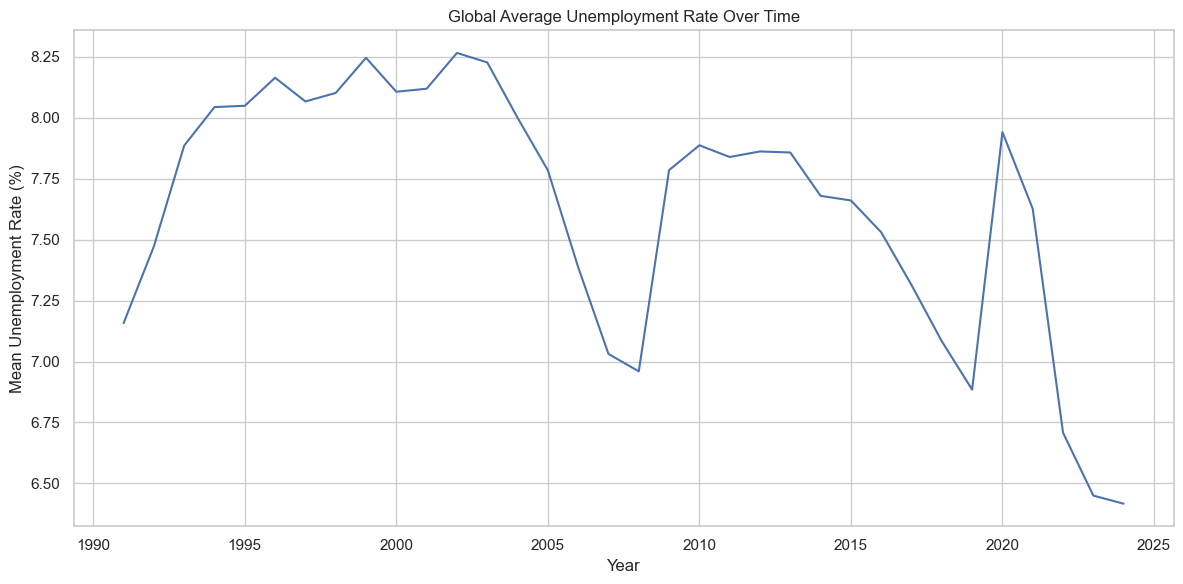

In [188]:
# Plotting the global mean unemployment rate over time
plt.figure(figsize=(12, 6))
yearly_trend = df_long.groupby('Year')['Unemployment Rate'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values)
plt.title('Global Average Unemployment Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()



# This plot shows how the global average unemployment rate changes over time,
# highlighting key trends such as spikes during major economic crises
# (the 2008–2009 financial crisis and the 2020 pandemic).

### 3.1 Plot 2: Histogram of Unemployment Rates


**Descriptive Analytics**
>
- This plot displays the distribution (spread, median, quartiles, and outliers) of unemployment rates for each year (x-axis: years, y-axis: unemployment rate).
>
Key Patterns

- The median unemployment rate is relatively stable across most years but may spike in crisis years (such as 2008–2009, 2020).

- The spread (interquartile range) indicates that some years see greater variability among countries.

- Outliers (points beyond the whiskers) highlight countries with unusually high unemployment in certain years.
>
**Diagnostic Analytics**

- Most countries typically maintain unemployment rates below 10% due to economic policy and labor market interventions.

- The right skewness can be driven by exceptional events (e.g., economic crises, wars, pandemics).



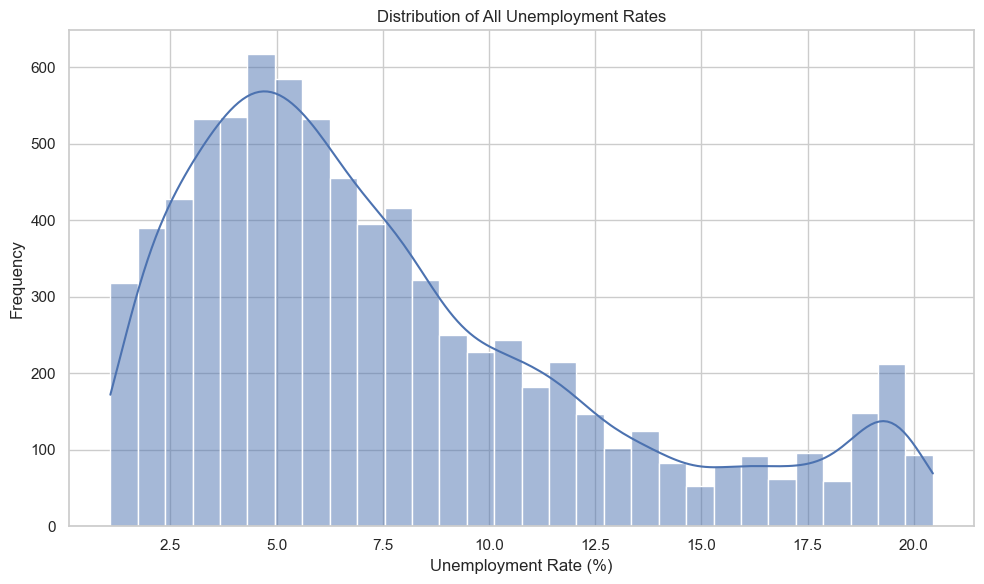

In [189]:
plt.figure(figsize=(10, 6))
sns.histplot(df_long['Unemployment Rate'], bins=30, kde=True)
plt.title('Distribution of All Unemployment Rates')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



### 3.2 Plot 3: Boxplot of Unemployment Rates Over Years

**Descriptive Analytics**

- This plot displays the distribution (spread, median, quartiles, and outliers) of unemployment rates for each year (x-axis: years, y-axis: unemployment rate).

Key Patterns

- The median unemployment rate is relatively stable across most years but may spike in crisis years (such as 2008–2009, 2020).

- The spread (interquartile range) indicates that some years see greater variability among countries.

- Outliers (points beyond the whiskers) highlight countries with unusually high unemployment in certain years.
>
**Diagnostic Analytics**

What explains the variation?

- Global events (e.g., the 2008 financial crisis, COVID-19 in 2020) cause synchronized increases in unemployment.

- Variation in spread may reflect regional crises, policy changes, or structural changes in certain economies.

- Outliers often point to countries facing unique, severe economic problems (hyperinflation, political turmoil).

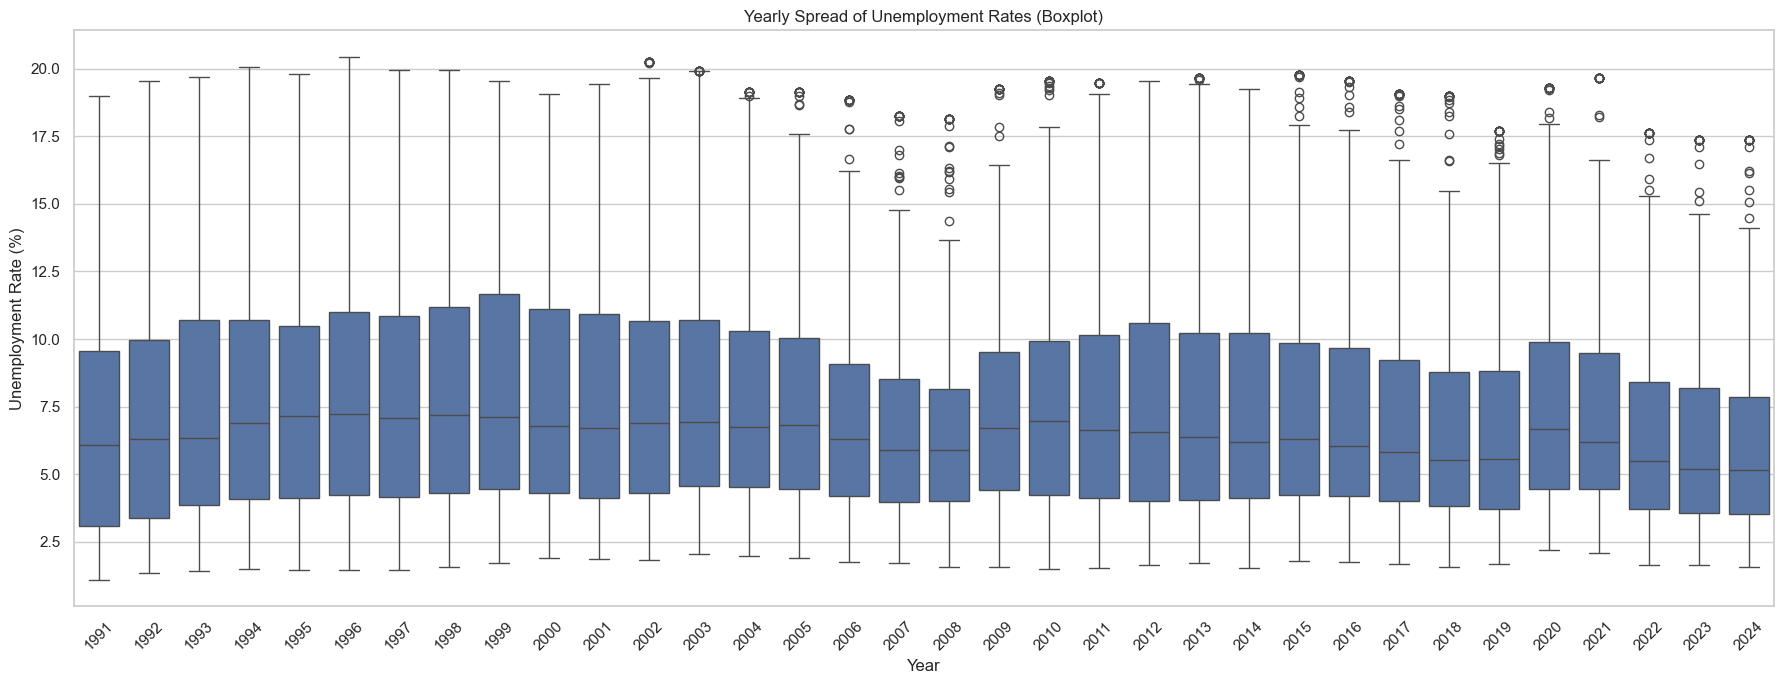

In [190]:
# Boxplot to visualize the spread of unemployment rates across years
# This boxplot displays the spread of unemployment rates across years from 1991 to 2024, 
# with the x-axis representing years and the y-axis representing unemployment rates (in percentage, ranging from 2.5% to 20%).
plt.figure(figsize=(18, 7))
sns.boxplot(x='Year', y='Unemployment Rate', data=df_long)
plt.title('Yearly Spread of Unemployment Rates (Boxplot)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 3.3 Plot 4: Small Multiples Line Chart for East African Countries.

**Descriptive Analytics**

- The chart displays year-by-year unemployment rates for each East African country from 1991 to 2024.

- Countries such as Kenya, Tanzania, and Uganda exhibit relatively stable unemployment rates, generally between 2% and 8%, with minor fluctuations over the decades.

- Ethiopia shows a gradual long-term decline, suggesting consistent labor market improvements.

- Rwanda and Burundi display relatively low unemployment rates, but with occasional small peaks.

- South Sudan and Somalia have more variable patterns, with higher spikes in certain years, possibly tied to instability.

- Pandemic year 2020 shows a small to moderate rise in unemployment for most countries, though the magnitude differs by country.

**Diagnostic Analytics**

- Stable patterns in Kenya, Tanzania, and Uganda suggest a steady economic structure or a large informal labor sector that cushions official unemployment figures.

- Ethiopia’s downward trend may be linked to infrastructure expansion, agricultural reforms, and investment-driven growth in the 2000s and 2010s.

- Rwanda’s stability may be the result of post-conflict reconstruction policies and targeted employment programs.

- Higher volatility in South Sudan and Somalia likely reflects political instability, conflict, and reliance on vulnerable economic sectors.

- The 2020 COVID-19 spike aligns with global economic disruption, though the relatively smaller jumps compared to other regions may be due to the dominance of informal work and subsistence farming, which are less affected by formal sector layoffs.

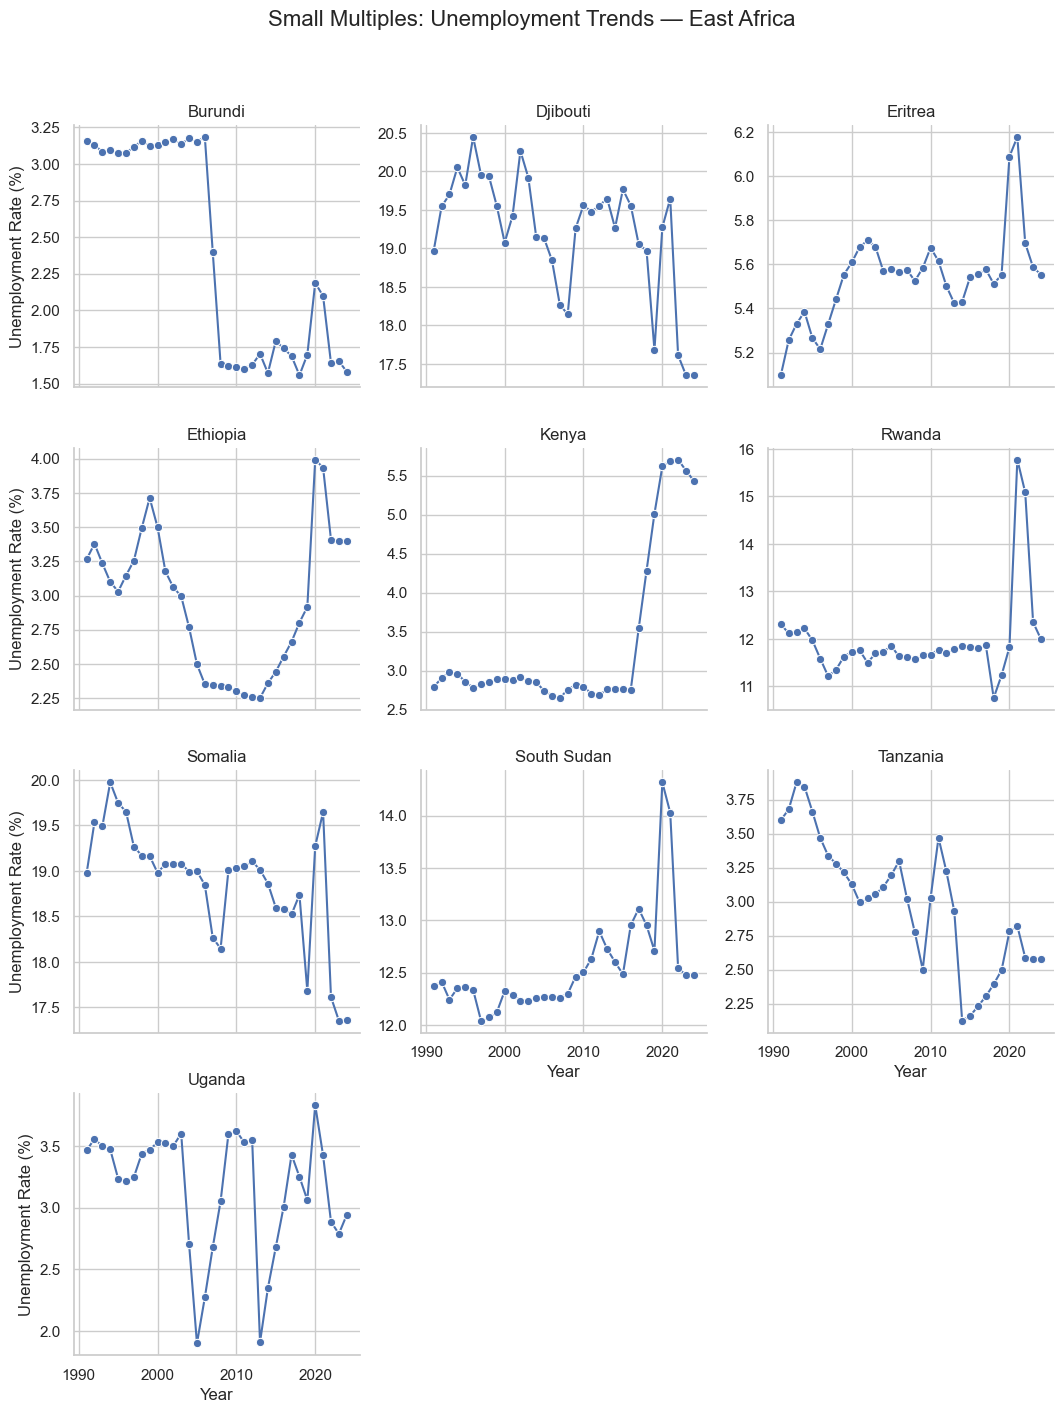

In [191]:

year_cols = [c for c in df_cleaned.columns if c.isdigit()]

# 2) Target East African countries (edit if you want more/less)
east_africa_targets = [
    "Kenya", "Tanzania", "Uganda", "Rwanda", "Burundi",
    "South Sudan", "Ethiopia", "Somalia", "Eritrea", "Djibouti"
]

# 3) Match to names present in your dataset (case-insensitive)
name_map = {n.lower(): n for n in df_cleaned["Country Name"].unique()}
present = [name_map[n.lower()] for n in east_africa_targets if n.lower() in name_map]
missing = [n for n in east_africa_targets if n.lower() not in name_map]

if missing:
    print("Not found in dataset (check spelling or availability):", missing)
if not present:
    raise ValueError("None of the requested East African countries were found in df_cleaned.")

# 4) Long format for plotting
df_long = df_cleaned.melt(
    id_vars=["Country Name", "Country Code"],
    value_vars=year_cols,
    var_name="Year",
    value_name="Unemployment Rate"
)

# 5) Filter to East Africa and make a real copy (avoid SettingWithCopyWarning)
df_small = df_long[df_long["Country Name"].isin(present)].copy()

# 6) Clean dtypes
df_small["Year"] = df_small["Year"].astype(int)
df_small["Unemployment Rate"] = pd.to_numeric(df_small["Unemployment Rate"], errors="coerce")

# 7) Plot small multiples
g = sns.FacetGrid(
    df_small,
    col="Country Name",
    col_wrap=3,        # change to 4 if you prefer a wider grid
    height=3.6,
    sharey=False
)
g.map_dataframe(sns.lineplot, x="Year", y="Unemployment Rate", marker="o")
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Unemployment Rate (%)")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Small Multiples: Unemployment Trends — East Africa", fontsize=16)
plt.show()


### 3.4 Plot 5: Bar Chart of Top/Bottom 50 Countries by Unemployment Rate (2024)

**Descriptive Analytics**

Shows the countries with the highest and lowest unemployment rates in 2024.

Key Patterns

- Clear distinction between regions: some regions dominate the high end, others the low.

- The top group may show rates above 20–30%, while the bottom is often under 4%.

**Diagnostic Analytics**

Factors at play?

- High unemployment often correlates with conflict, macroeconomic instability, or transition economies.

- Low unemployment may be seen in wealthy or resource-rich countries, or those with large informal sectors not captured in official statistics.

- Regional policy, labor market structure, and reporting practices all contribute.

C:\Users\Light House\AppData\Local\Temp\ipykernel_15308\2296283492.py:32: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



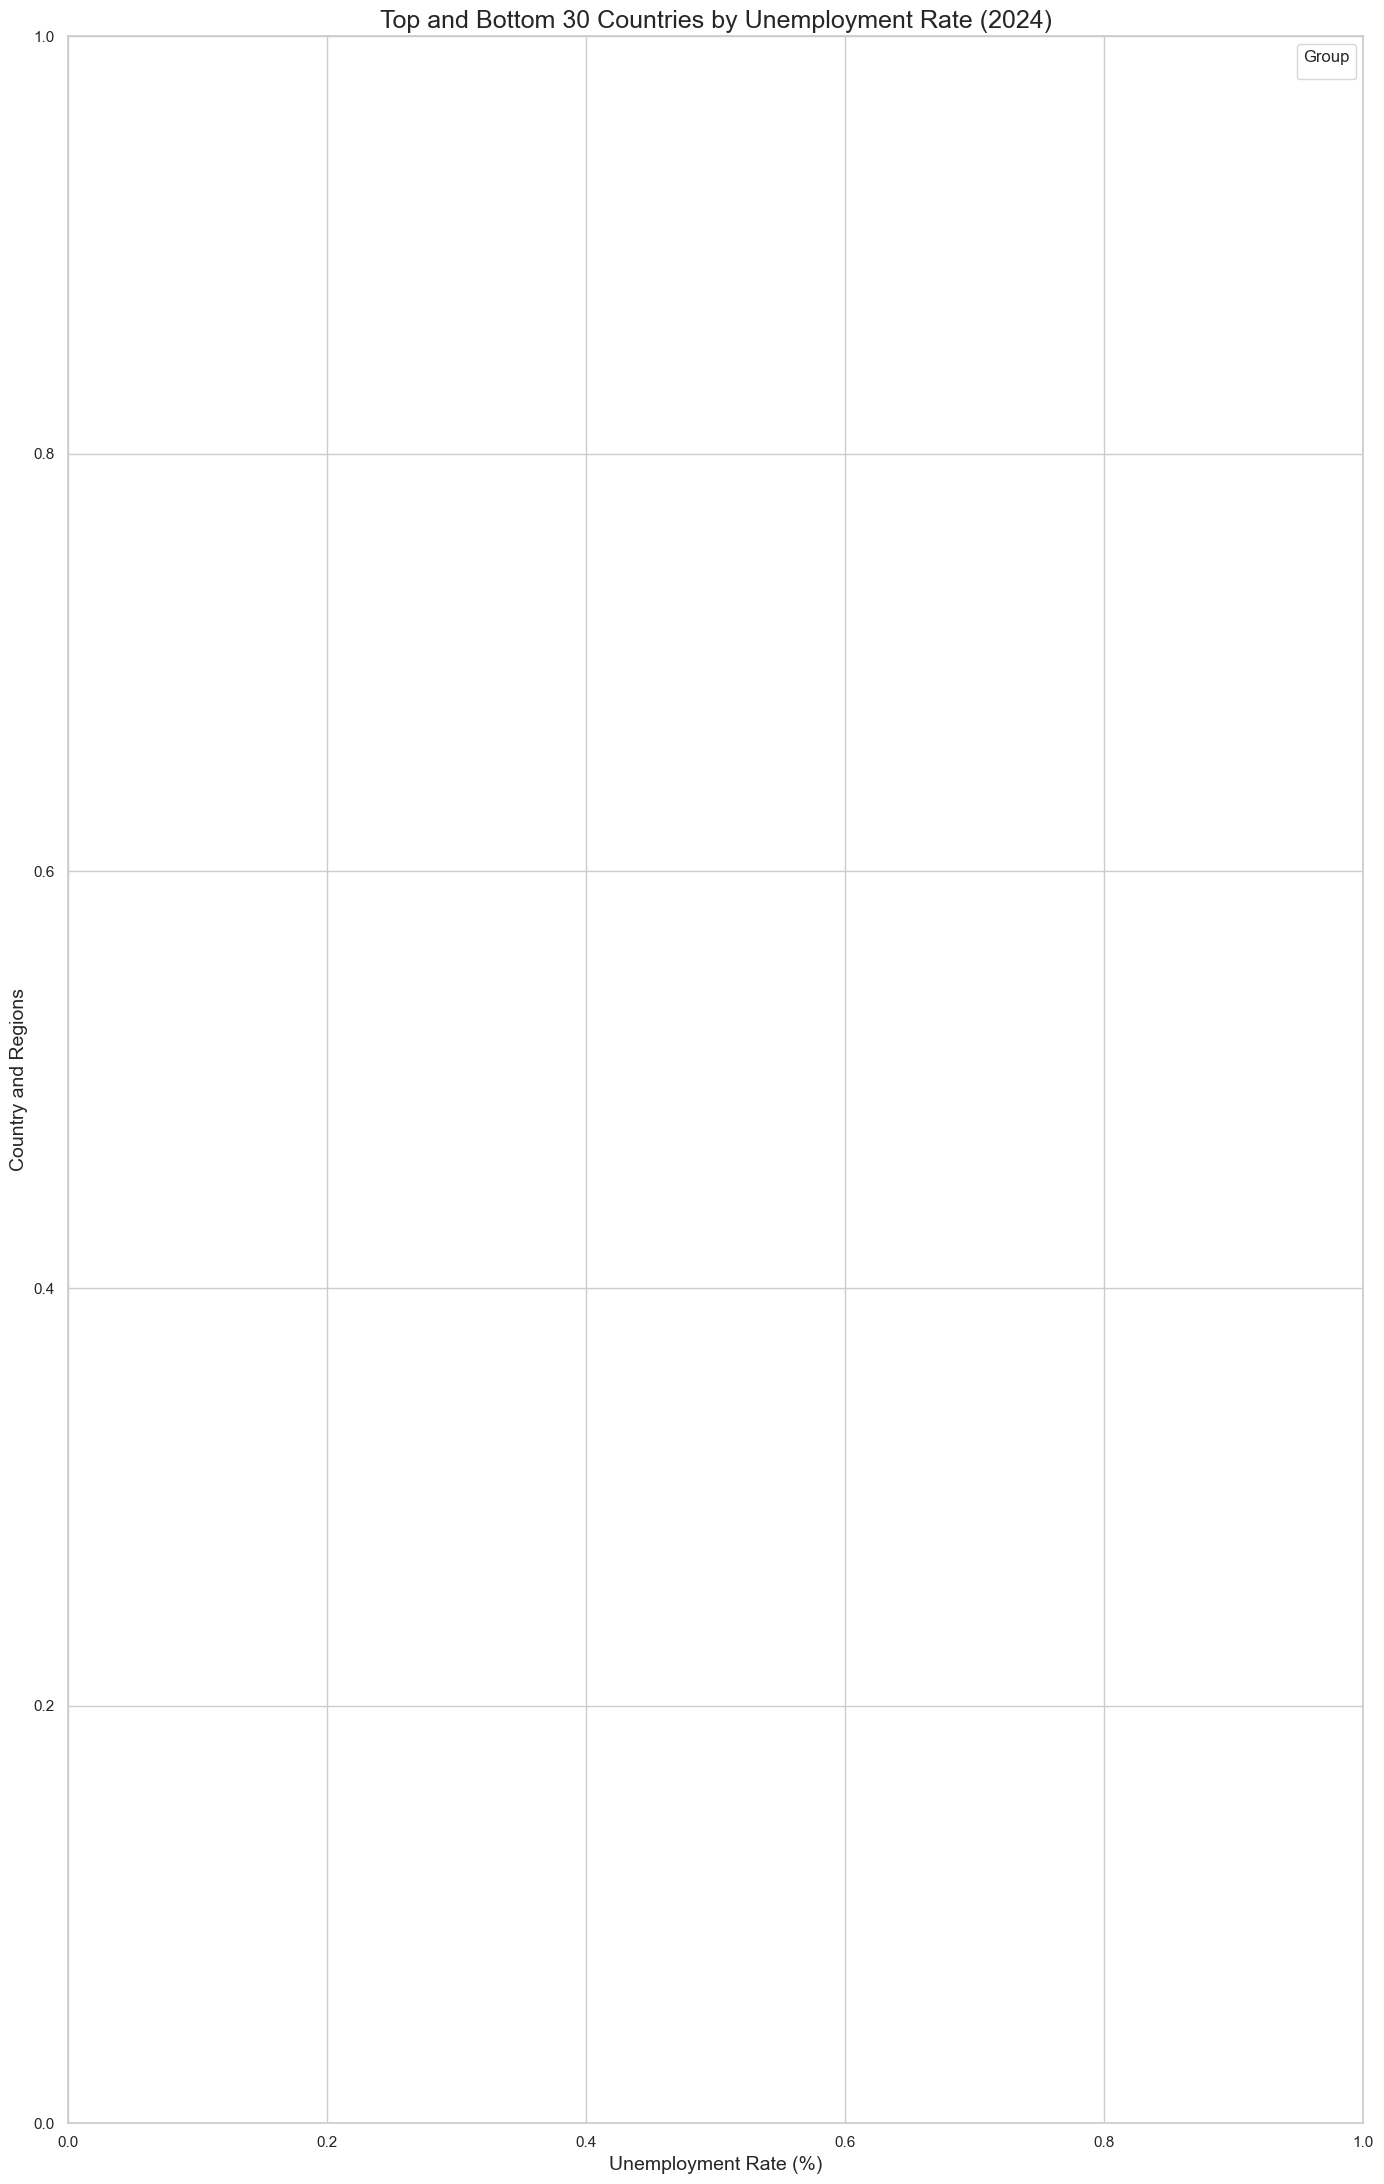

In [192]:
# This identifies countries with extreme unemployment rates in 2024, providing insight into economic disparities.
# Filter for 2024 and sort by unemployment rate
df_2024 = df_long[df_long['Year'] == 2024][['Country Name', 'Unemployment Rate']].sort_values(by='Unemployment Rate', ascending=False)

# Top 30 and bottom 30
top_30 = df_2024.head(30).copy()
bottom_30 = df_2024.tail(30).copy()

# Add group labels
top_30['Group'] = 'Top 30 (Highest)'
bottom_30['Group'] = 'Bottom 30 (Lowest)'

# Combine data
extreme_countries = pd.concat([top_30, bottom_30])

# Sort for visualization
extreme_countries = extreme_countries.sort_values(by='Unemployment Rate', ascending=False)

# Plot bar chart
plt.figure(figsize=(14, 22))  # taller for 100 countries
sns.barplot(
    data=extreme_countries, 
    x='Unemployment Rate', 
    y='Country Name', 
    hue='Group', 
    dodge=False
)

plt.title('Top and Bottom 30 Countries by Unemployment Rate (2024)', fontsize=18)
plt.xlabel('Unemployment Rate (%)', fontsize=14)
plt.ylabel('Country and Regions', fontsize=14)
plt.legend(title='Group')
plt.tight_layout()
plt.show()

### 3.5 Plot 6: Line Plot of Global Average Unemployment Rate Over Time

**Descriptive Analytics**

- Shows how the global average unemployment rate (y-axis) changes over time (x-axis: years).

Key Patterns

- Trend,Generally stable with visible peaks and dips.

- Notable spikes during well known crises (e.g., sharp rise around 2008–2009, and possibly 2020).

- Gradual recoveries post crisis periods.

**Diagnostic Analytics**

Reasons for the trends:

- Global recessions and pandemics cause synchronous increases.

- Recoveries are often slower, reflecting labor market rigidities and lagged policy effects.

- Small fluctuations in “normal” years reflect varying regional situations.

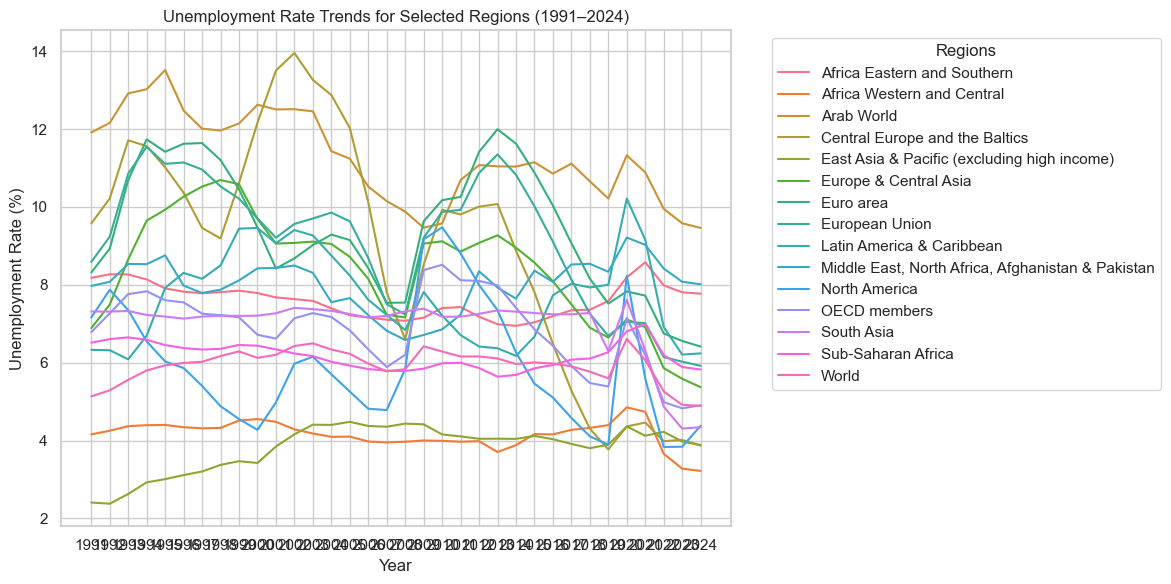

In [193]:
# Analyzing these provides a macro-level perspective,complementing country specific analyses.
# Plot unemployment trends for selected regions
selected_regions = [
    'Africa Eastern and Southern',
    'Africa Western and Central',
    'Arab World',
    'Central Europe and the Baltics',
    'East Asia & Pacific (excluding high income)',
    'Europe & Central Asia',
    'Euro area',
    'European Union',
    'Latin America & Caribbean',
    'Middle East, North Africa, Afghanistan & Pakistan',
    'North America',
    'OECD members',
    'South Asia',
    'Sub-Saharan Africa',
    'World'
]
df_selected = df_long[df_long['Country Name'].isin(selected_regions)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected, x='Year', y='Unemployment Rate', hue='Country Name')
plt.title('Unemployment Rate Trends for Selected Regions (1991–2024)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Regions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### 3.6 Plot 7: Correlation Matrix of Unemployment Rates (1991–2024)

**Descriptive Analytics**

- This matrix visualizes correlations between unemployment rates across different years.

Key Patterns

- Strong positive correlation along the diagonal and between adjacent years (e.g., 2017 and 2018).

- Weaker correlations between years further apart.

**Diagnostic Analytics**

why the pattern?

- Unemployment rates tend to be “sticky” countries’ labor market conditions usually persist from year to year.

- Weakening correlation over longer intervals reflects structural changes, policy shifts, and shocks affecting labor market

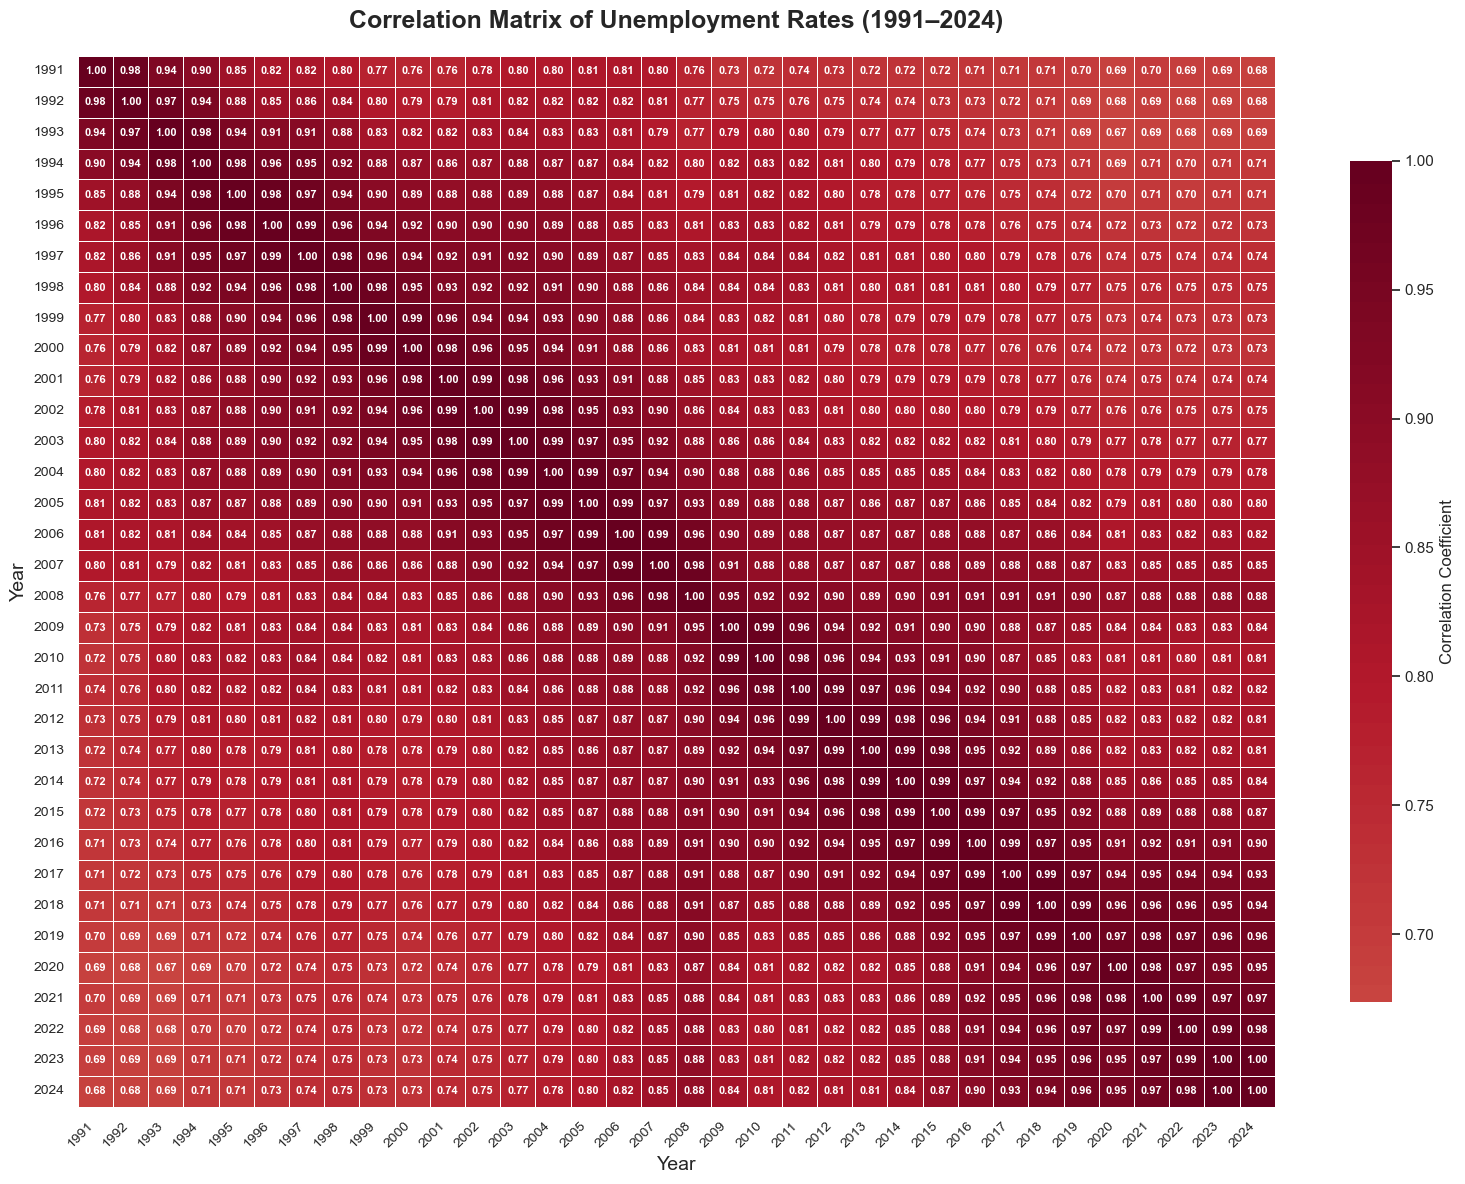

In [194]:
# Compute correlation matrix for unemployment rates across years
corr_matrix = df_cleaned[year_cols].corr()


# Full heatmap with enhanced styling
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    cmap='RdBu_r',  # Vibrant colormap for positive/negative correlations
    center=0,  # Center at zero for clear distinction
    annot=True,  # Show correlation values
    fmt='.2f',  # Two decimal places
    annot_kws={'size': 8, 'weight': 'bold'},  # Smaller, bold annotations
    linewidths=0.5,  # Grid lines for clarity
    linecolor='white',  # White grid lines
    cbar_kws={'label': 'Correlation Coefficient', 'shrink': 0.8}  # Colorbar label
)
plt.title('Correlation Matrix of Unemployment Rates (1991–2024)', fontsize=18, weight='bold', pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()




Key Correlations:
Correlation between 2019 and 2020: 0.97
Correlation between 2008 and 2009: 0.95


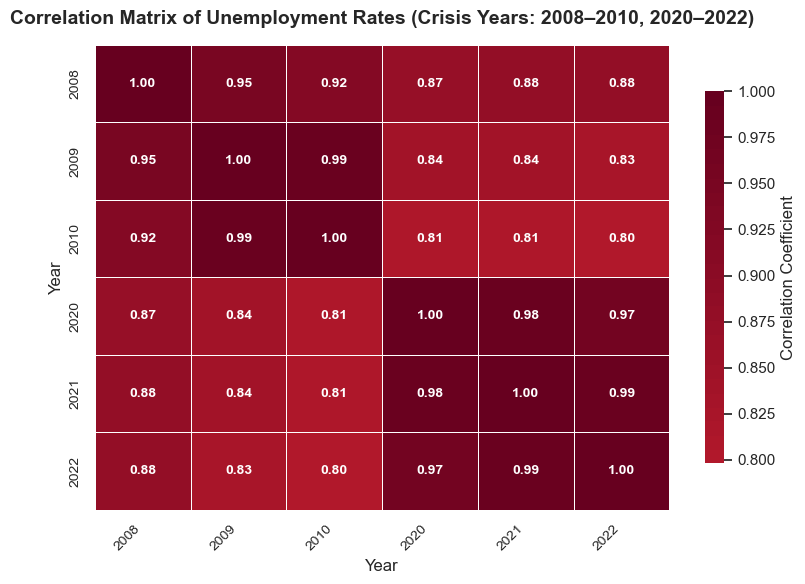

In [195]:
# Print key correlations for interpretation
print("\nKey Correlations:")
print(f"Correlation between 2019 and 2020: {corr_matrix.loc['2019', '2020']:.2f}")
print(f"Correlation between 2008 and 2009: {corr_matrix.loc['2008', '2009']:.2f}")


# Focused heatmap for crisis years (2008–2010, 2020–2022)
crisis_years = ['2008', '2009', '2010', '2020', '2021', '2022']
crisis_corr_matrix = df_cleaned[crisis_years].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(
    crisis_corr_matrix,
    cmap='RdBu_r',
    center=0,
    annot=True,
    fmt='.2f',
    annot_kws={'size': 10, 'weight': 'bold'},
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Correlation Coefficient', 'shrink': 0.8}
)
plt.title('Correlation Matrix of Unemployment Rates (Crisis Years: 2008–2010, 2020–2022)', fontsize=14, weight='bold', pad=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### 3.7 Plot 8: Feature Importance (Random Forest)

**Descriptive Analytics**

- The plot ranks the past 5 years of unemployment rates (2019–2023) by their importance in predicting 2024 unemployment rates.

- 2023 dominates with the highest importance (~84%), followed far behind by 2022 (~8%), 2021 (~3%), 2020 (~2%), and 2019 (~1.9%).

- The steep drop in importance after 2023 suggests the model relies heavily on the most recent year’s data to make accurate forecasts.

- Earlier lags (2020 and 2019) contribute minimally, indicating that historical unemployment data becomes less predictive as it ages.

**Diagnostic Analytics**

- The high importance of 2023 suggests that short-term memory is critical in unemployment forecasting,recent conditions are the most reliable indicators for the next year.

- This pattern aligns with the autocorrelation often observed in economic time series, where values change gradually over time unless disrupted by major events.

- The low importance of older years implies that structural changes or shocks in the labor market make distant historical data less relevant.

- For countries with volatile or irregular unemployment trends, the model may still benefit from multiple lag years, but here, stability in trends makes the last year’s rate sufficient for strong predictions.

- Policy implication, efforts to reduce unemployment may show measurable predictive effects as early as the following year, making short-term monitoring essential.

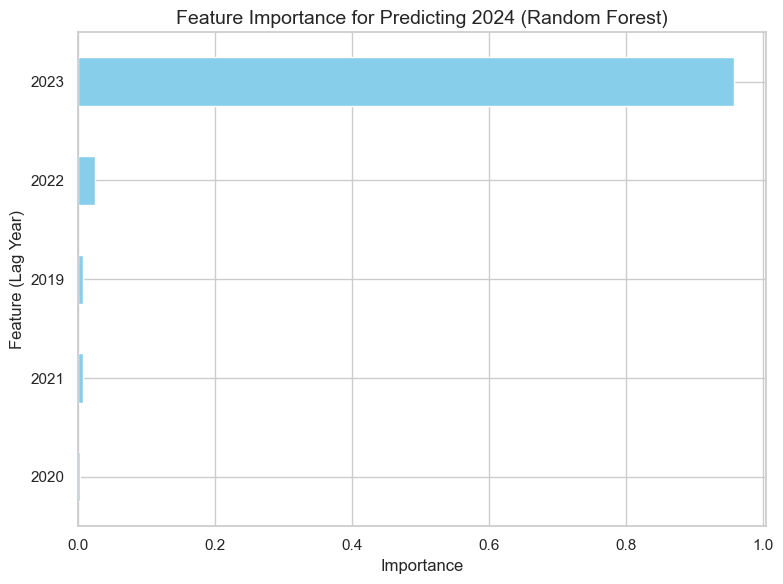

2023    0.957085
2022    0.025430
2019    0.006920
2021    0.006824
2020    0.003742
dtype: float64

In [196]:
from sklearn.ensemble import RandomForestRegressor

# Prepare lag features: use past N years to predict 2024
N_lags = 5
latest_year = 2024
feature_years = [str(latest_year - i) for i in range(1, N_lags+1)]
target_year = str(latest_year)

# Drop rows with missing data for chosen years
model_df = df_cleaned[['Country Name'] + feature_years + [target_year]].dropna()
X = model_df[feature_years]
y = model_df[target_year]

# Train Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=feature_years).sort_values(ascending=True)

# Plot
plt.figure(figsize=(8, 6))
importances.plot(kind='barh', color='skyblue')
plt.title(f"Feature Importance for Predicting {target_year} (Random Forest)", fontsize=14)
plt.xlabel("Importance")
plt.ylabel("Feature (Lag Year)")
plt.tight_layout()
plt.show()

importances.sort_values(ascending=False)


### 3.8 Plot 9: Animated Forecast Plot

**Descriptive Analytics**

The animation visualizes unemployment rates for each country over time, with the Year progressing frame-by-frame from 1991 to 2024.

Each bubble represents a country, with:

- Y-axis: unemployment rate (%).

- Bubble size: magnitude of unemployment rate (larger = higher unemployment).

- Color: unique country identifier.

- Certain years, such as 2008–2009 and 2020, show multiple countries experiencing upward shifts in bubble position and size,indicating simultaneous unemployment spikes across the globe.

- Many countries cluster at lower unemployment levels (below 6%), while fewer countries occupy the high-rate zone (>15%).

**Diagnostic Analytics**

The synchronized spike in 2008–2009 corresponds to the global financial crisis, showing its widespread effect on labor markets worldwide.

The sharp and broad increase in 2020 aligns with the COVID-19 pandemic, which disrupted economies globally.

Post-2020, the plot reveals mixed recovery trajectories, some countries’ bubbles shrink and drop (recovery), while others remain elevated (slower rebound).

Countries consistently in the high unemployment zone may face structural labor market challenges, such as political instability, lack of diversification, or weak private sectors.

Countries with minimal movement across frames show labor market stability, possibly due to large informal sectors or strong economic resilience.

In [197]:
import plotly.express as px

# Melt the dataframe into long format for plotly
df_long = df_cleaned.melt(id_vars=["Country Name", "Country Code"], 
                          value_vars=year_cols,
                          var_name="Year", value_name="Unemployment Rate")

# Convert Year to integer
df_long["Year"] = df_long["Year"].astype(int)

# Build animated scatter plot (showing countries' unemployment rates over time)
fig = px.scatter(df_long,
                 x="Year",
                 y="Unemployment Rate",
                 animation_frame="Year",
                 animation_group="Country Name",
                 size="Unemployment Rate",
                 color="Country Name",
                 hover_name="Country Name",
                 range_x=[1990, 2025],
                 range_y=[0, df_long["Unemployment Rate"].max() + 5],
                 title="Animated Evolution of Unemployment Rates (1991–2024)")

fig.update_layout(showlegend=False)
fig.show()


### 3.9 Plot 9: Ridge-Style Unemployment Rate Distributions Over Time


**Descriptive Analytics**

The plot compares global unemployment rate distributions for six key years: 1991, 2000, 2008, 2010, 2020, and 2024.

Each colored curve represents the density of unemployment rates across all countries in that year.

1991 and 2000 curves are narrower and skewed toward lower unemployment rates, indicating most countries had rates below 10%.

2008 and 2010 show a wider spread, with more countries experiencing mid-to-high unemployment rates following the global financial crisis.

2020 has a noticeable shift upward, with density peaking at higher unemployment rates,reflecting the global economic disruption caused by COVID-19.

2024’s curve shifts slightly downward compared to 2020, suggesting partial recovery but still broader variation than pre-2008.

**Descriptive Analytics**

The plot compares global unemployment rate distributions for six key years: 1991, 2000, 2008, 2010, 2020, and 2024.

Each colored curve represents the density of unemployment rates across all countries in that year.

1991 and 2000 curves are narrower and skewed toward lower unemployment rates, indicating most countries had rates below 10%.

2008 and 2010 show a wider spread, with more countries experiencing mid-to-high unemployment rates following the global financial crisis.

2020 has a noticeable shift upward, with density peaking at higher unemployment rates,reflecting the global economic disruption caused by COVID-19.

2024’s curve shifts slightly downward compared to 2020, suggesting partial recovery but still broader variation than pre-2008.





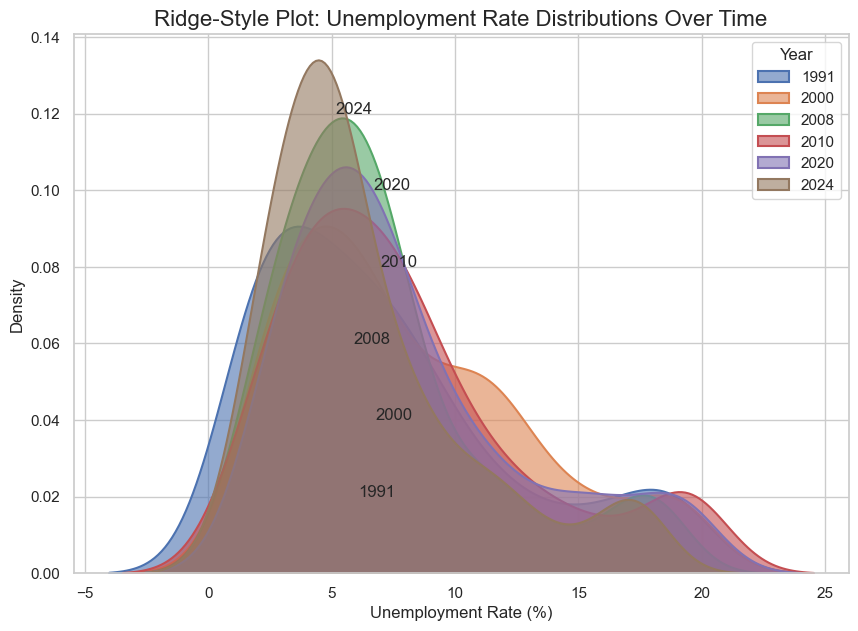

In [198]:
# Prepare data for selected years
selected_years = ['1991', '2000', '2008', '2010', '2020', '2024']
ridge_df = df_cleaned[['Country Name'] + selected_years].melt(id_vars="Country Name",
                                                              var_name="Year",
                                                              value_name="Unemployment Rate")

# Sort years so they stack logically
year_order = sorted(selected_years, key=int)

# Create ridge-like plot using seaborn
plt.figure(figsize=(10, 7))
for i, year in enumerate(year_order):
    subset = ridge_df[ridge_df["Year"] == year]
    sns.kdeplot(subset["Unemployment Rate"], fill=True, alpha=0.6,
                label=year, linewidth=1.5)
    plt.text(x=subset["Unemployment Rate"].median(), y=i*0.02 + 0.02, s=year)

plt.title("Ridge-Style Plot: Unemployment Rate Distributions Over Time", fontsize=16)
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Density")
plt.legend(title="Year")
plt.show()


## Step 4: Pre-treatment for machine learning

#####  4.1 Feature Engineering,create lagged features for time-series prediction

To predict the unemployment rate for year $ t+1 $, I wll use historical unemployment rates as features. I will create a feature set for supervised learning.

I created lagged features for each country to predict unemployment rate atleast one year ahead.



In [199]:

def create_lagged_features(df, target_year, lag_years=3):
  
    lagged_data = []
    for index, row in df.iterrows():
        country = row['Country Name']
        country_code = row['Country Code']
        for year in range(1991 + lag_years, target_year + 1):  
            features = []
            target = row[str(year)]  
            if pd.isna(target):  
                continue

            # Collect lagged features (e.g., t-1, t-2, t-3)
            for lag in range(1, lag_years + 1):
                lag_year = year - lag
                feature_value = row[str(lag_year)]
            # Skip if any feature is missing
                if pd.isna(feature_value):  
                    break
                features.append(feature_value)
            else:  
                lagged_data.append([country, country_code, year] + features + [target])
    
    columns = ['Country Name', 'Country Code', 'Year'] + [f'Lag_{i}' for i in range(1, lag_years + 1)] + ['Target']
    return pd.DataFrame(lagged_data, columns=columns)

# Create lagged features
lagged_df = create_lagged_features(df_cleaned, target_year=2024, lag_years=3)

# Verify that 'Country Code' is present
print("Columns in lagged_df:", lagged_df.columns.tolist())
print(lagged_df.head(20))

Columns in lagged_df: ['Country Name', 'Country Code', 'Year', 'Lag_1', 'Lag_2', 'Lag_3', 'Target']
                   Country Name Country Code  Year     Lag_1     Lag_2  \
0   Africa Eastern and Southern          AFE  1994  8.266327  8.270724   
1   Africa Eastern and Southern          AFE  1995  8.138291  8.266327   
2   Africa Eastern and Southern          AFE  1996  7.908446  8.138291   
3   Africa Eastern and Southern          AFE  1997  7.823908  7.908446   
4   Africa Eastern and Southern          AFE  1998  7.783654  7.823908   
5   Africa Eastern and Southern          AFE  1999  7.812734  7.783654   
6   Africa Eastern and Southern          AFE  2000  7.849878  7.812734   
7   Africa Eastern and Southern          AFE  2001  7.788317  7.849878   
8   Africa Eastern and Southern          AFE  2002  7.676955  7.788317   
9   Africa Eastern and Southern          AFE  2003  7.632330  7.676955   
10  Africa Eastern and Southern          AFE  2004  7.586883  7.632330   
11  Africa E

##### 4.2 Encode Country Code

**Why We Need It**

- Machine learning models like linear regression require numerical inputs,because of that,I applied One-Hot Encoding to the Country Code column.

- "Country Code" is categorical it contains text labels (e.g., "AFG", "KEN", "USA") which models cannot directly interpret as numbers in a meaningful way.

- If you simply replace categories with numbers (e.g., AFG=1, KEN=2), the model might think there’s an order or distance between them (like "KEN" > "AFG"), which is incorrect.




In [200]:
lagged_df = pd.get_dummies(lagged_df, columns=['Country Code'], prefix='Country')

In [201]:
# Verify one-hot encoding
print("Columns after one-hot encoding:", lagged_df.columns.tolist())

print(lagged_df.head())

Columns after one-hot encoding: ['Country Name', 'Year', 'Lag_1', 'Lag_2', 'Lag_3', 'Target', 'Country_AFE', 'Country_AFG', 'Country_AFW', 'Country_AGO', 'Country_ALB', 'Country_ARB', 'Country_ARE', 'Country_ARG', 'Country_ARM', 'Country_AUS', 'Country_AUT', 'Country_AZE', 'Country_BDI', 'Country_BEL', 'Country_BEN', 'Country_BFA', 'Country_BGD', 'Country_BGR', 'Country_BHR', 'Country_BHS', 'Country_BIH', 'Country_BLR', 'Country_BLZ', 'Country_BOL', 'Country_BRA', 'Country_BRB', 'Country_BRN', 'Country_BTN', 'Country_BWA', 'Country_CAF', 'Country_CAN', 'Country_CEB', 'Country_CHE', 'Country_CHI', 'Country_CHL', 'Country_CHN', 'Country_CIV', 'Country_CMR', 'Country_COD', 'Country_COG', 'Country_COL', 'Country_COM', 'Country_CPV', 'Country_CRI', 'Country_CSS', 'Country_CUB', 'Country_CYP', 'Country_CZE', 'Country_DEU', 'Country_DJI', 'Country_DNK', 'Country_DOM', 'Country_DZA', 'Country_EAP', 'Country_EAR', 'Country_EAS', 'Country_ECA', 'Country_ECS', 'Country_ECU', 'Country_EGY', 'Count

##### 4.3 Feature Scaling

Linear Regression and XGBoost,to some extent are sensitive to feature scales,while Random Forest is less affected.

Scaling standardizes the features so that they have:

- Mean = 0

- Standard deviation = 1

This puts all features on an equal footing, so models can learn more effectively.

In [202]:
from sklearn.preprocessing import StandardScaler

# Define feature_cols if not already defined
feature_cols = [col for col in lagged_df.columns if col.startswith('Lag_') or col.startswith('Country_')]

scaler = StandardScaler()
X_scaled_df = pd.DataFrame(
    scaler.fit_transform(lagged_df[feature_cols]),
    columns=feature_cols
)
# Check mean and standard deviation after scaling
print("Feature means after scaling:\n", X_scaled_df.mean())
print("\nFeature standard deviations after scaling:\n", X_scaled_df.std())
X_scaled_df.head()


Feature means after scaling:
 Lag_1          1.170420e-17
Lag_2         -4.486612e-17
Lag_3         -6.047172e-17
Country_AFE    1.170420e-17
Country_AFG    1.560561e-17
                   ...     
Country_WSM    7.802803e-18
Country_YEM    1.950701e-17
Country_ZAF    2.340841e-17
Country_ZMB    2.340841e-17
Country_ZWE    3.901401e-17
Length: 238, dtype: float64

Feature standard deviations after scaling:
 Lag_1          1.000069
Lag_2          1.000069
Lag_3          1.000069
Country_AFE    1.000069
Country_AFG    1.000069
                 ...   
Country_WSM    1.000069
Country_YEM    1.000069
Country_ZAF    1.000069
Country_ZMB    1.000069
Country_ZWE    1.000069
Length: 238, dtype: float64


Lag_1     Lag_2     Lag_3  Country_AFE  Country_AFG  Country_AFW  \
0  0.118645  0.111994  0.089759    15.297059    -0.065372    -0.065372   
1  0.092044  0.111086  0.108475    15.297059    -0.065372    -0.065372   
2  0.044291  0.084653  0.107571    15.297059    -0.065372    -0.065372   
3  0.026727  0.037200  0.081265    15.297059    -0.065372    -0.065372   
4  0.018364  0.019747  0.034042    15.297059    -0.065372    -0.065372   

   Country_AGO  Country_ALB  Country_ARB  Country_ARE  ...  Country_VEN  \
0    -0.065372    -0.065372    -0.065372    -0.065372  ...    -0.065372   
1    -0.065372    -0.065372    -0.065372    -0.065372  ...    -0.065372   
2    -0.065372    -0.065372    -0.065372    -0.065372  ...    -0.065372   
3    -0.065372    -0.065372    -0.065372    -0.065372  ...    -0.065372   
4    -0.065372    -0.065372    -0.065372    -0.065372  ...    -0.065372   

   Country_VIR  Country_VNM  Country_VUT  Country_WLD  Country_WSM  \
0    -0.065372    -0.065372    -0.065372    -0.065372    -0.065372   
1    -0.065372    -0.065372    -0.065372    -0.065372    -0.065372   
2    -0.065372    -0.065372    -0.065372    -0.065372    -0.065372   
3    -0.065372    -0.065372    -0.065372    -0.065372    -0.065372   
4    -0.065372    -0.065372    -0.065372    -0.065372    -0.065372   

   Country_YEM  Country_ZAF  Country_ZMB  Country_ZWE  
0    -0.065372    -0.065372    -0.065372    -0.065372  
1    -0.065372    -0.065372    -0.065372    -0.065372  
2    -0.065372    -0.065372    -0.065372    -0.065372  
3    -0.065372    -0.065372    -0.065372    -0.065372  
4    -0.065372    -0.065372    -0.065372    -0.065372  

[5 rows x 238 columns]

##### 4.4 Train-Test Split

Splitting the dataset into training and testing sets ensures that we can train the model on one portion of the data and evaluate its performance on unseen data.
>
For time-series or forecasting problems, it’s important to use temporal splitting so that the model is tested on future periods only, avoiding data leakage.

In [203]:

from sklearn.model_selection import train_test_split

y = lagged_df['Target']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Optionally, split based on year to ensure temporal separation
train_df = lagged_df[lagged_df['Year'] < 2020]
test_df = lagged_df[lagged_df['Year'] >= 2020]
X_train = train_df[feature_cols]
y_train = train_df['Target']
X_test = test_df[feature_cols]
y_test = test_df['Target']

# Scale the features for train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Check the size of each split

In [204]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (6110, 238)
Test shape: (1175, 238)


Confirm temporal separation

In [205]:
print("Train years:", train_df['Year'].min(), "-", train_df['Year'].max())
print("Test years:", test_df['Year'].min(), "-", test_df['Year'].max())


Train years: 1994 - 2019
Test years: 2020 - 2024


Check row overlaps for data leakage prevention

In [206]:
train_ids = set(train_df.index)
test_ids = set(test_df.index)
print("Overlap:", len(train_ids.intersection(test_ids)))


Overlap: 0


Verification of the x_train and x_test

In [207]:
print(train_df['Year'].unique())



[1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]


In [208]:
print(test_df['Year'].unique())

[2020 2021 2022 2023 2024]
